# Practical Text Classification with Python and Keras

Reading the mood from text with machine learning is called sentiment analysis, and it is one of the prominent use cases in text classification. This falls into the very active research field of natural language processing (NLP). Other common use cases of text classification include detection of spam, auto tagging of customer queries, and categorization of text into defined topics. So how can you do this?

Main point is to convert sentences:
CountVectorizer and fit the sentences and then transform your data. The transformed data will be the count of vocabulary words which was gotten from countvectorizer.fit() method

Sequence Processing

This tutorial is done with the help of RealPython

In [4]:
# lets import datasets and analyse them
import pandas as pd

filepath_dict = {'yelp':'C:/Users/dared/Desktop/RealPyton/Practical-text-Classification/sentiment labelled sentences/sentiment labelled sentences/yelp_labelled.txt',
                'amazon':'C:/Users/dared/Desktop/RealPyton/Practical-text-Classification/sentiment labelled sentences/sentiment labelled sentences/amazon_cells_labelled.txt',
                'imdb':'C:/Users/dared/Desktop/RealPyton/Practical-text-Classification/sentiment labelled sentences/sentiment labelled sentences/imdb_labelled.txt'}

df_list = []

for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence','label'], sep= '\t')
    df['source'] = source
    df_list.append(df)

df = pd.concat(df_list)
print(df.iloc[0])

sentence    A very, very, very slow-moving, aimless movie ...
label                                                       0
source                                                   imdb
Name: 0, dtype: object


The vocabulary in this case is a list of words that occurred in our text where each word has its own index. This enables you to create a vector for a sentence. You would then take the sentence you want to vectorize, and you count each occurrence in the vocabulary. The resulting vector will be with the length of the vocabulary and a count for each word in the vocabulary.

The resulting vector is also called a feature vector. In a feature vector, each dimension can be a numeric or categorical feature, like for example the height of a building, the price of a stock, or, in our case, the count of a word in a vocabulary. These feature vectors are a crucial piece in data science and machine learning, as the model you want to train depends on them.

We start by taking the Yelp data set which we extract from our concatenated data set. From there, we take the sentences and labels. The .values returns a NumPy array instead of a Pandas Series object which is in this context easier to work with:

In [6]:
from sklearn.model_selection import train_test_split

df_yelp = df[df['source']=='yelp']
sentences = df_yelp['sentence'].values #return values in a numpy array
y= df_yelp['label'].values

In [7]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences,y,test_size=0.25, random_state=1000)

Here we will create a Bag of Words model which will help us create vectors of sentences based on the the occurence of words in the vocabulary

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

#Once we have the vocabulary, we just have to convert our 
#training data into vectors
X_train = vectorizer.transform(sentences_train)
X_test = vectorizer.transform(sentences_test)
X_train

<750x1714 sparse matrix of type '<class 'numpy.int64'>'
	with 7368 stored elements in Compressed Sparse Row format>

CountVectorizer performs tokenization which separates the sentences into a set of tokens as seen previously in the vocabulary. It additionally removes punctuation and special characters and can apply other preprocessing to each word.

We will use a logistic regression technique which will classify the sentiment as 0 and 1. Logistic Regression is in fact a classification methodology

In [10]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

score = classifier.score(X_test,y_test)
print("Accuracy : {}".format(score))

Accuracy : 0.796


c:\users\dared\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Applying this same technique on all the sources

In [13]:
for source in df['source'].unique():
    df_source = df[df['source']==source]
    sentences = df_source['sentence'].values
    y = df_source['label'].values
    
    sentences_train, sentences_test, y_train, y_test = train_test_split(sentences,y,test_size=0.25, random_state=1000)
    
    vectorizer = CountVectorizer()
    vectorizer.fit(sentences_train)
    
    X_train = vectorizer.transform(sentences_train)
    X_test = vectorizer.transform(sentences_test)
    
    classifier = LogisticRegression()
    classifier.fit(X_train,y_train)
    score = classifier.score(X_test,y_test)
    print('Accuracy for {} source is: {}'.format(source,score))

Accuracy for imdb source is: 0.7486631016042781
Accuracy for amazon source is: 0.796
Accuracy for yelp source is: 0.796


# Using Neural Networks 

In [15]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]

#make a sequential model with layers
model = Sequential()
model.add(layers.Dense(10,input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

#model compilation
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                17150     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 17,161
Trainable params: 17,161
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_training = model.fit(X_train,y_train,epochs=100,verbose=False,validation_data=(X_test,y_test), batch_size=10)

In [17]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.7880


In [18]:
#visualization

import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

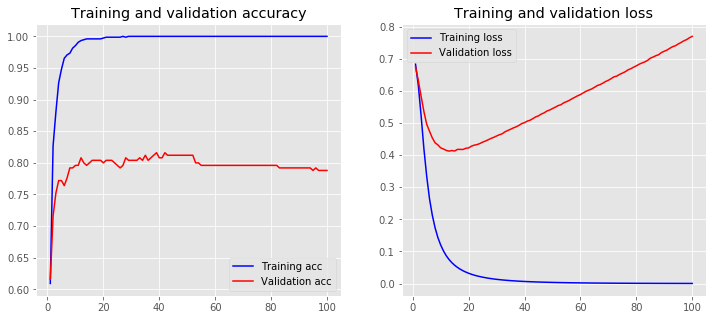

In [19]:
plot_history(model_training)

Testing Accuracy:  0.7840


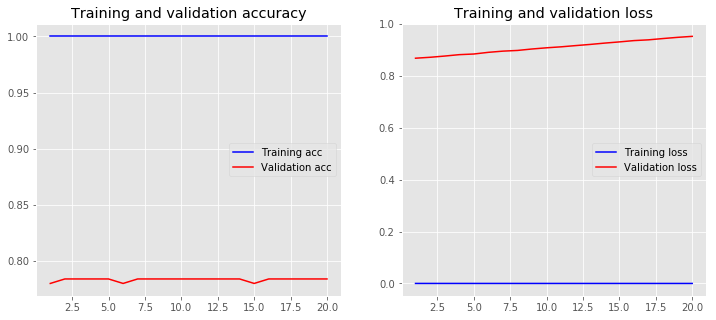

In [22]:
# epochs change
model_training_2 = model.fit(X_train,y_train,epochs=20,verbose=False,validation_data=(X_test,y_test), batch_size=10)
plot_history(model_training_2)
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


# Word Embedding

1) Use one-hot encoding

2) Use Word Embeddings

Note that the word embeddings do not understand the text as a human would, but they rather map the statistical structure of the language used in the corpus. Their aim is to map semantic meaning into a geometric space. This geometric space is then called the embedding space.

In [24]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer (num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)
print(X_train[1])

vocab_size = len(tokenizer.word_index)+1
print(sentences_train[1])

#indexing is done by most common words

[740, 4, 46, 12, 20, 160, 10, 72, 35, 355, 232]
Sorry, I will not be getting food from here anytime soon :(


In [25]:
for word in ['the', 'all', 'happy', 'sad']:
    print('{}: {}'.format(word, tokenizer.word_index[word]))

the: 1
all: 43
happy: 320
sad: 450


With CountVectorizer, we had stacked vectors of word counts, and each vector was the same length (the size of the total corpus vocabulary). With Tokenizer, the resulting vectors equal the length of each text, and the numbers don’t denote counts, but rather correspond to the word values from the dictionary tokenizer.word_index.

In [32]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0,:])

[  1  10   3 282 739  25   8 208  30  64 459 230  13   1 124   5 231   8
  58   5  67   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


# Keras Embedding Layer

In [33]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           87350     
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                50010     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 137,371
Trainable params: 137,371
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 0.5067
Testing Accuracy:  0.4800


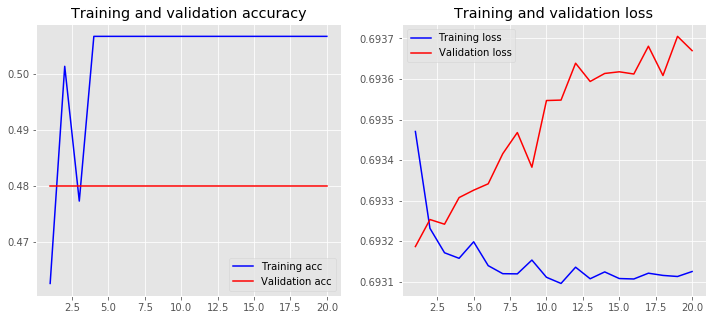

In [34]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [35]:
#Adding max Pool layers 
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           87350     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 87,871
Trainable params: 87,871
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.8040


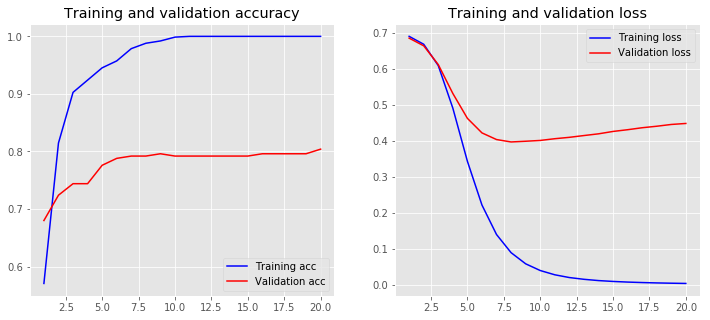

In [36]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

# Convolutional Neural Networks

In [37]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          174700    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 240,129
Trainable params: 240,129
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.7840


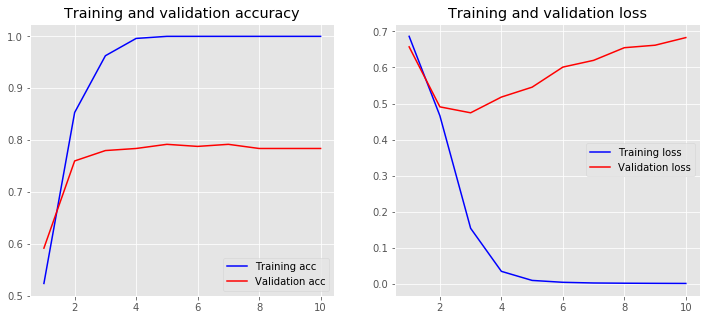

In [38]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [53]:
sentence = ["Hello!! you are nice to me"]
X_pred = tokenizer.texts_to_sequences(sentence)
X_pred

[[29, 31, 57, 5, 75]]

In [54]:
X_pred = pad_sequences(X_pred, padding='post', maxlen=maxlen)
print(X_pred)

[[29 31 57  5 75  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]]


In [55]:
model.predict(X_pred)

array([[0.9997774]], dtype=float32)